In [1]:
import pandas as pd
df=pd.read_csv(r"E:\Github Projects\Otodom\Otodom Poland.csv")
df.head()

,timestamp,title,price,market,surface,location,remote_support,lighting,advertiser_type,description,no_of_rooms,form_of_property,url,is_for_sale,posting_id
0,2024-02-20,Kameralny zakątek blisko wszędzie 2 pokoje 55 ...,660000.0,"market,secondary",55,"Mysiadło, Lesznowola, piaseczyński, mazowieckie",NaN,NaN,agency,Jeśli chcesz mieszkać w zielonej okolicy lecz ...,2,pełna własność,https://otodom.pl/pl/oferta/kameralny-zakatek-...,True,4n5Li
1,2024-02-20,"Wykończone mieszkanie, gotowe do zamieszkania!",395000.0,"market,secondary",33.72,"ul. Saperów 12, Kazuń Nowy, Czosnów, nowodwors...",NaN,NaN,agency,Z dumą prezentujemy na sprzedaż urokliwe miesz...,2,pełna własność,https://otodom.pl/pl/oferta/wykonczone-mieszka...,True,4p7BD
2,2024-02-20,"Mieszkanie 4-pokojowe,blisko jeziora na I pięt...",330000.0,"market,secondary",56.51,"ul. Reinholda Barcza, Szczytno, szczycieński, ...",NaN,NaN,agency,"Jeśli szukają Państwo idealnej nieruchomości, ...",4,pełna własność,https://otodom.pl/pl/oferta/mieszkanie-4-pokoj...,True,4paZL
3,2024-02-20,"4 pokoje, 81 m2, w super lokalizacji",688000.0,"market,secondary",81,"ul. Niepodległości, Gorzów Wielkopolski, lubuskie",NaN,NaN,private,"Sprzedaż bez pośredników, bez prowizjiSprzedam...",4,pełna własność,https://otodom.pl/pl/oferta/4-pokoje-81-m2-w-s...,True,4oQHS
4,2024-02-20,Sprzedam Mieszkanie ul. Kwiatowa-Lubin,390000.0,"market,primary",40.18,"ul. Kwiatowa, Lubin, lubiński, dolnośląskie",NaN,NaN,private,Oferta od właściciela- bez Pośredników.\r\n\r\...,2,pełna własność,https://otodom.pl/pl/oferta/sprzedam-mieszkani...,True,4oYh5


In [2]:
df.shape

(1000, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         1000 non-null   object 
 1   title             1000 non-null   object 
 2   price             995 non-null    float64
 3   market            997 non-null    object 
 4   surface           1000 non-null   object 
 5   location          1000 non-null   object 
 6   remote_support    258 non-null    object 
 7   lighting          0 non-null      float64
 8   advertiser_type   1000 non-null   object 
 9   description       1000 non-null   object 
 10  no_of_rooms       1000 non-null   int64  
 11  form_of_property  905 non-null    object 
 12  url               1000 non-null   object 
 13  is_for_sale       1000 non-null   bool   
 14  posting_id        976 non-null    object 
dtypes: bool(1), float64(2), int64(1), object(11)
memory usage: 110.5+ KB


<span style="color:blue">HANDLING MISSING VALUES</span>

In [4]:
df.isna().sum()

timestamp              0
title                  0
price                  5
market                 3
surface                0
location               0
remote_support       742
lighting            1000
advertiser_type        0
description            0
no_of_rooms            0
form_of_property      95
url                    0
is_for_sale            0
posting_id            24
dtype: int64

<span style="color:blue">Since the column lighting is completely null we can drop it entirely. Also we can impute with mean for price column since it's numerical, for categorical column 'market', 'form_of_property' we can impute with mode. Also we can drop the null entries for the column 'posting_id'</span>

In [5]:
df=df.drop('lighting', axis=1)
df['price'].fillna(df['price'].mean(), inplace=True)
df['market'].fillna(df['market'].mode()[0], inplace=True)
df['form_of_property'].fillna(df['form_of_property'].mode()[0], inplace=True)
df.dropna(subset=['posting_id'], inplace=True)

In [6]:
df.isna().sum()

timestamp             0
title                 0
price                 0
market                0
surface               0
location              0
remote_support      738
advertiser_type       0
description           0
no_of_rooms           0
form_of_property      0
url                   0
is_for_sale           0
posting_id            0
dtype: int64

In [7]:
df['remote_support'].value_counts()

true    238
Name: remote_support, dtype: int64

<span style="color:blue">This shows that for the column 'remote_support' there are 238 entries which are True, so rest 738 entries are not populated with 'False' and might appear as 'Null' in the dataset, let's check it</span>

In [8]:
#Checking if all the entries except True are null only
df['remote_support'].dropna().unique()

array(['true'], dtype=object)

<span style="color:blue">Perfect! Let's fill those entries with 'False' for our simplicity</span>

In [9]:
df['remote_support'].fillna(False, inplace=True)
df['remote_support'].value_counts()

False    738
true     238
Name: remote_support, dtype: int64

<span style="color:blue">Alright! Now we're done dealing with missing values</span>

In [10]:
df.isna().sum()

timestamp           0
title               0
price               0
market              0
surface             0
location            0
remote_support      0
advertiser_type     0
description         0
no_of_rooms         0
form_of_property    0
url                 0
is_for_sale         0
posting_id          0
dtype: int64

<span style="color:blue">Let's inspect our df</span>

In [11]:
df

,timestamp,title,price,market,surface,location,remote_support,advertiser_type,description,no_of_rooms,form_of_property,url,is_for_sale,posting_id
0,2024-02-20,Kameralny zakątek blisko wszędzie 2 pokoje 55 ...,660000.0,"market,secondary",55,"Mysiadło, Lesznowola, piaseczyński, mazowieckie",False,agency,Jeśli chcesz mieszkać w zielonej okolicy lecz ...,2,pełna własność,https://otodom.pl/pl/oferta/kameralny-zakatek-...,True,4n5Li
1,2024-02-20,"Wykończone mieszkanie, gotowe do zamieszkania!",395000.0,"market,secondary",33.72,"ul. Saperów 12, Kazuń Nowy, Czosnów, nowodwors...",False,agency,Z dumą prezentujemy na sprzedaż urokliwe miesz...,2,pełna własność,https://otodom.pl/pl/oferta/wykonczone-mieszka...,True,4p7BD
2,2024-02-20,"Mieszkanie 4-pokojowe,blisko jeziora na I pięt...",330000.0,"market,secondary",56.51,"ul. Reinholda Barcza, Szczytno, szczycieński, ...",False,agency,"Jeśli szukają Państwo idealnej nieruchomości, ...",4,pełna własność,https://otodom.pl/pl/oferta/mieszkanie-4-pokoj...,True,4paZL
3,2024-02-20,"4 pokoje, 81 m2, w super lokalizacji",688000.0,"market,secondary",81,"ul. Niepodległości, Gorzów Wielkopolski, lubuskie",False,private,"Sprzedaż bez pośredników, bez prowizjiSprzedam...",4,pełna własność,https://otodom.pl/pl/oferta/4-pokoje-81-m2-w-s...,True,4oQHS
4,2024-02-20,Sprzedam Mieszkanie ul. Kwiatowa-Lubin,390000.0,"market,primary",40.18,"ul. Kwiatowa, Lubin, lubiński, dolnośląskie",False,private,Oferta od właściciela- bez Pośredników.\r\n\r\...,2,pełna własność,https://otodom.pl/pl/oferta/sprzedam-mieszkani...,True,4oYh5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-09-04,"Mieszkanie, 61,03 m², Lublin",457725.0,"market,primary",61.03,"Dziesiąta, Lublin, lubelskie",False,agency,"Lublin, Dziesiąta, M-1.7 61.03m2. Oferta Devel...",4,pełna własność,https://otodom.pl/pl/oferta/mieszkanie-61-03-m...,True,4l89u
996,2023-09-04,Promocja Ogród Dwa miejsca postojowe Pompa ciepła,474000.0,"market,primary",93.49,"ul. Marii Skłodowskiej-Curie, Wołów, Wołów, wo...",true,developer,Jako doświadczony Deweloper Mieszkajlogicznie ...,4,pełna własność,https://otodom.pl/pl/oferta/promocja-ogrod-dwa...,True,4kYqn
997,2023-09-04,Promocja! ostanie 4 pokoje,619987.0,"market,primary",74.25,"Karłowice, Psie Pole, Wrocław, dolnośląskie",False,agency,Opiekun oferty: Patrycja Kaczmarektel. 602 101...,4,pełna własność,https://otodom.pl/pl/oferta/promocja-ostanie-4...,True,4kYYz
998,2023-09-04,Przestronne 2 pokoje z balkonem,519000.0,"market,secondary",52.14,"ul. Limby, Warszewo, Północ, Szczecin, zachodn...",False,agency,Przestronne mieszkanie z balkonem na Warszewie...,2,pełna własność,https://otodom.pl/pl/oferta/przestronne-2-poko...,True,4lxap


<span style="color:blue">We can observe that the column 'market' contains values like "market, secondary" and "market, primary" which could be reduced down to "secondary" or "primary"</span>

In [12]:
df['market'] = df['market'].str.split(',').str.get(1)  # This splits the string at the comma and takes the second element.

In [14]:
# Check the unique values in the new 'market_type' column to ensure it contains only 'secondary' and 'primary'
df['market'].unique()

array(['secondary', 'primary'], dtype=object)

<span style="color:blue">Let's check out the data types of all the columns whether they're correctly mapped or not</span> 

In [15]:
df.dtypes

timestamp            object
title                object
price               float64
market               object
surface              object
location             object
remote_support       object
advertiser_type      object
description          object
no_of_rooms           int64
form_of_property     object
url                  object
is_for_sale            bool
posting_id           object
dtype: object

<span style="color:blue">It can be seen that timestamp is object rather than datetime, Similary
                                             remote_support is object rather than boolean,
                                             surface is object rather than float</span>

In [16]:
#Converting timestamp from object to datetime
#Surface is object and need to use astype(int)
#remote_support is int64 and need to use astype(bool)
df['timestamp']=pd.to_datetime(df['timestamp'])
df['surface'] = df['surface'].astype(float)
df['remote_support'] = df['remote_support'].astype(bool)

type1 = df['timestamp'].dtype
type2 = df['surface'].dtype
type3 = df['remote_support'].dtype

type1, type2, type3

(dtype('<M8[ns]'), dtype('float64'), dtype('bool'))

<span style="color:blue">Let's check the datatype now</span>

In [17]:
df.dtypes

timestamp           datetime64[ns]
title                       object
price                      float64
market                      object
surface                    float64
location                    object
remote_support                bool
advertiser_type             object
description                 object
no_of_rooms                  int64
form_of_property            object
url                         object
is_for_sale                   bool
posting_id                  object
dtype: object

<span style="color:blue"> Let's see how 'price' is related to other columns to get an idea of which factor is crucial for determining which features influence prices in Poland.</span> 

<span style="color:blue"> The columns that can be correlated with Price are
                          1) Surface
                          2) No of Rooms
</span>

<span style="color:blue">Let's encode boolean columns 'remote_support' into numerical value to see the correlation with Price.</span>

<span style="color:blue"> Note : The columns 'is_for_sale' contains only True value so it won't reflect in correlation with Price.</span>

In [18]:
#Checking correlation for price with other variables so converting boolean to 1/0
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['remote_support']])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['remote_support']))
df_encoded

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,remote_support_False,remote_support_True
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
971,1.0,0.0
972,0.0,1.0
973,1.0,0.0
974,1.0,0.0


<span style="color:blue">Perfect! Let's group the column with data types float, int and bool</span> 

In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64', 'bool'])
df_num.head()

,price,surface,remote_support,no_of_rooms,is_for_sale
0,660000.0,55.00,False,2,True
1,395000.0,33.72,False,2,True
2,330000.0,56.51,False,4,True
3,688000.0,81.00,False,4,True
4,390000.0,40.18,False,2,True


In [22]:
df_num_corr = df_num.corr()['price']# -1 because the latest row is SalePrice
df_num_corr

price             1.000000
surface           0.348266
remote_support    0.063900
no_of_rooms       0.248908
is_for_sale            NaN
Name: price, dtype: float64

<span style="color:blue">Note that the column 'is_for_sale' returns NaN because it has only kind of value i.e. True so it was not encoded using OneHotEncoder</span> 

<AxesSubplot:>

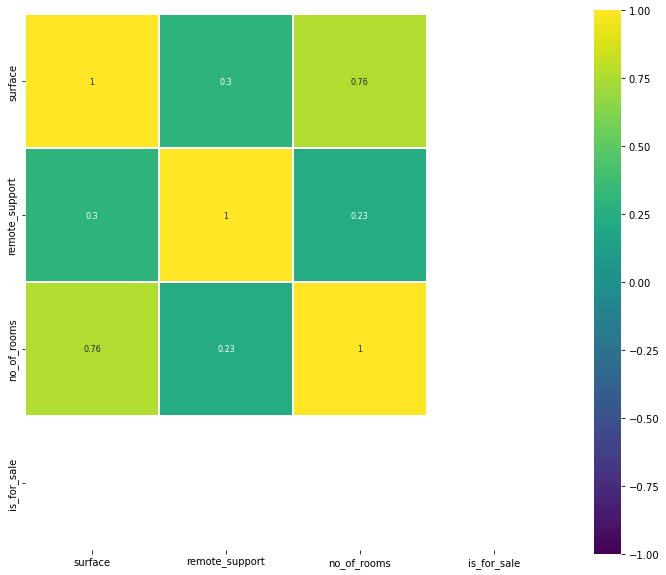

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_num.drop('price', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

<span style="color:blue">Let's extract year, month, weekday from timestamp which could be helpful in further analysis</span> 

In [24]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday #Monday =0 and Sunday = 6

df[['year','month','weekday']].tail()

,year,month,weekday
995,2023,9,0
996,2023,9,0
997,2023,9,0
998,2023,9,0
999,2023,9,0


<span style="color:blue">Let's inspect the weekday column which has numerical values rather than weekdays</span>

In [25]:
df['weekday'].value_counts()

0    460
1    453
2     62
3      1
Name: weekday, dtype: int64

<span style="color:blue">We can observe that weekday is coded as Monday : 0, Tuesday : 1... We can actually get the actual name of weekday rather than coded values using map() function.</span> 

In [26]:
days = { 0: 'Monday',
         1: 'Tuesday',
         2: 'Wednesday',
         3: 'Thursday' }

df['weekday'] = df['weekday'].map(days)

In [27]:
df['weekday'].head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: weekday, dtype: object

<span style="color:blue">Let's change the order of the columns as per our needs.</span> 

In [28]:
new_order = ['posting_id', 'timestamp', 'year', 'month', 'weekday', 'price',
             'location', 'no_of_rooms', 'is_for_sale', 'title', 'market', 'form_of_property', 'surface', 
             'remote_support', 'advertiser_type', 'url', 'description'
             ]

df=df[new_order]

In [29]:
df.head()

,posting_id,timestamp,year,month,weekday,price,location,no_of_rooms,is_for_sale,title,market,form_of_property,surface,remote_support,advertiser_type,url,description
0,4n5Li,2024-02-20,2024,2,Tuesday,660000.0,"Mysiadło, Lesznowola, piaseczyński, mazowieckie",2,True,Kameralny zakątek blisko wszędzie 2 pokoje 55 ...,secondary,pełna własność,55.00,False,agency,https://otodom.pl/pl/oferta/kameralny-zakatek-...,Jeśli chcesz mieszkać w zielonej okolicy lecz ...
1,4p7BD,2024-02-20,2024,2,Tuesday,395000.0,"ul. Saperów 12, Kazuń Nowy, Czosnów, nowodwors...",2,True,"Wykończone mieszkanie, gotowe do zamieszkania!",secondary,pełna własność,33.72,False,agency,https://otodom.pl/pl/oferta/wykonczone-mieszka...,Z dumą prezentujemy na sprzedaż urokliwe miesz...
2,4paZL,2024-02-20,2024,2,Tuesday,330000.0,"ul. Reinholda Barcza, Szczytno, szczycieński, ...",4,True,"Mieszkanie 4-pokojowe,blisko jeziora na I pięt...",secondary,pełna własność,56.51,False,agency,https://otodom.pl/pl/oferta/mieszkanie-4-pokoj...,"Jeśli szukają Państwo idealnej nieruchomości, ..."
3,4oQHS,2024-02-20,2024,2,Tuesday,688000.0,"ul. Niepodległości, Gorzów Wielkopolski, lubuskie",4,True,"4 pokoje, 81 m2, w super lokalizacji",secondary,pełna własność,81.00,False,private,https://otodom.pl/pl/oferta/4-pokoje-81-m2-w-s...,"Sprzedaż bez pośredników, bez prowizjiSprzedam..."
4,4oYh5,2024-02-20,2024,2,Tuesday,390000.0,"ul. Kwiatowa, Lubin, lubiński, dolnośląskie",2,True,Sprzedam Mieszkanie ul. Kwiatowa-Lubin,primary,pełna własność,40.18,False,private,https://otodom.pl/pl/oferta/sprzedam-mieszkani...,Oferta od właściciela- bez Pośredników.\r\n\r\...


<span style="color:blue">For our calculations in SQL we want 'posting_id' to be our Primary Key and it can only be achieved if all the values of 'posting_id' are unique. 
    So let's check</span> 

In [30]:
duplicates = df['posting_id'].duplicated().any()
print("Are there any duplicate 'posting_id's:", duplicates)

Are there any duplicate 'posting_id's: True


<span style="color:blue">It means we have duplicate entries in 'posting_id' and we want to remove duplicate entries in posting_id. It can be done by using duplicated() method in pandas returns a boolean Series indicating whether each row is a duplicate of a row occurring earlier in the DataFrame.</span>

In [31]:
# Find duplicated 'posting_id' entries
duplicate_posting_ids = df[df['posting_id'].duplicated(keep=False)]['posting_id']

# Display the duplicated 'posting_id' values
print(duplicate_posting_ids.unique())

['4k9TP' '4lYBy' '4lBh3']


<span style="color:blue">So it means ['4k9TP' '4lYBy' '4lBh3'] are duplicate entries in the 'posting_id' column and we can keep the first occurence of ['4k9TP' '4lYBy' '4lBh3'] and remove the duplicate entries.</span> 

<span style="color:blue">The duplicated method in pandas returns a boolean Series indicating whether each row is a duplicate of a row occurring earlier in the DataFrame.</span>

<span style="color:blue"> When you use duplicated(keep=False), it marks all duplicates as True, not just the first or last occurrence. So when you filter the DataFrame df using this boolean Series</span>  

In [32]:
duplicates = df[df['posting_id'].duplicated(keep=False)]

In [33]:
specific_ids = ['4k9TP', '4lYBy', '4lBh3'] 
filtered_duplicates = duplicates[duplicates['posting_id'].isin(specific_ids)]
filtered_duplicates

,posting_id,timestamp,year,month,weekday,price,location,no_of_rooms,is_for_sale,title,market,form_of_property,surface,remote_support,advertiser_type,url,description
199,4k9TP,2023-09-04,2023,9,Monday,598000.0,"ul. Janowska, Cisowa, Gdynia, pomorskie",3,True,"Gotowe do zamieszkania 3 pokoje, 62,80m2, Cisowa",secondary,pełna własność,62.8,False,agency,https://www.otodom.pl/pl/oferta/gotowe-do-zami...,Mieszkanie gotowe do zamieszkania w Gdyni-Ciso...
355,4lYBy,2024-02-20,2024,2,Tuesday,359000.0,"ul. Trzech Krzyży, Radziejów, Rybnik, śląskie",6,True,Na sprzedaż dom Rybnik-Radziejów! Duża działka!,secondary,pełna własność,110.0,True,agency,https://otodom.pl/pl/oferta/na-sprzedaz-dom-ry...,DOM WYPŁACONY ZE SZKÓD GÓRNICZYCH.Na sprzedaż ...
558,4lYBy,2023-09-04,2023,9,Monday,359000.0,"ul. Trzech Krzyży, Radziejów, Rybnik, śląskie",6,True,Na sprzedaż dom Rybnik-Radziejów! Duża działka!,secondary,pełna własność,110.0,True,agency,https://www.otodom.pl/pl/oferta/na-sprzedaz-do...,DOM WYPŁACONY ZE SZKÓD GÓRNICZYCH.Na sprzedaż ...
590,4k9TP,2023-09-04,2023,9,Monday,598000.0,"ul. Janowska, Cisowa, Gdynia, pomorskie",3,True,"Gotowe do zamieszkania 3 pokoje, 62,80m2, Cisowa",secondary,pełna własność,62.8,False,agency,https://otodom.pl/pl/oferta/gotowe-do-zamieszk...,Mieszkanie gotowe do zamieszkania w Gdyni-Ciso...
591,4lBh3,2023-09-04,2023,9,Monday,479000.0,"Czerniejewo, Czerniejewo, gnieźnieński, wielko...",4,True,Gotowe! Poznan Wrzesnia Czerniejewo,primary,pełna własność,96.0,True,agency,https://otodom.pl/pl/oferta/gotowe-poznan-wrze...,W PROPOZYCJI SPRZEDAŻY PROPONUJEMY NOWO POWSTA...
633,4lBh3,2024-01-17,2024,1,Wednesday,479000.0,"Czerniejewo, Czerniejewo, gnieźnieński, wielko...",4,True,Gotowe! Poznan Wrzesnia Czerniejewo,primary,pełna własność,96.0,True,agency,https://www.otodom.pl/pl/oferta/gotowe-poznan-...,W PROPOZYCJI SPRZEDAŻY PROPONUJEMY NOWO POWSTA...


<span style="color:blue">Let's keep the first occurence of the repeated values and drop the other occurences of the repeated values</span>  

In [34]:
df = df.drop_duplicates(subset='posting_id', keep='first')

<span style="color:blue">Now let's check whether there are any duplicate entries remaining in our 'posting_id'</span>  

In [35]:
duplicates = df['posting_id'].duplicated().any()
print("Are there any duplicate 'posting_id's:", duplicates)

Are there any duplicate 'posting_id's: False


<span style="color:blue">We can finally save this dataframe to a CSV file for our analysis in SQL</span> 

In [ ]:
df.to_csv(r"E:\Github Projects\Otodom.csv", index=False)

<span style="color:blue">VISUALIZATION USING SEABORN AND MATPLOTLIB</span> 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

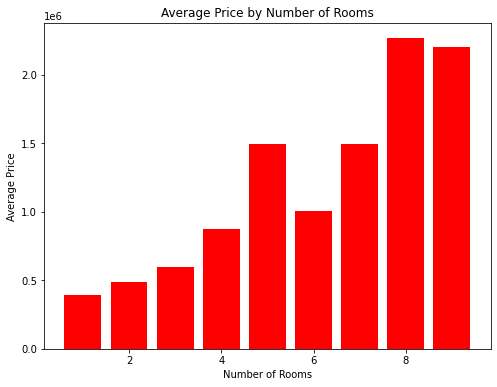

In [37]:
#Average Price by Room Number:
plt.figure(figsize=(8,6))
avg_price_per_room = df.groupby('no_of_rooms')['price'].mean().reset_index()
plt.bar(avg_price_per_room['no_of_rooms'], avg_price_per_room['price'], color='red')
plt.title('Average Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.show()

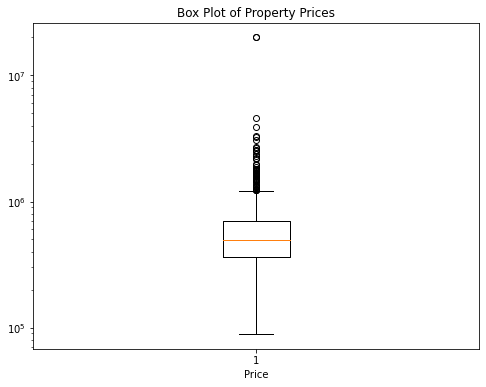

In [38]:
#Box Plot of Prices
plt.figure(figsize=(8,6))
plt.boxplot(df['price'], vert=True)
plt.title('Box Plot of Property Prices')
plt.yscale('log')
plt.xlabel('Price')
plt.show()

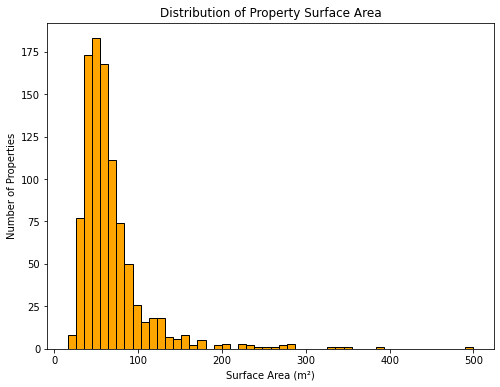

In [39]:
# Histogram for Surface Area Distribution:
plt.figure(figsize=(8,6))
plt.hist(df['surface'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Property Surface Area')
plt.xlabel('Surface Area (m²)')
plt.ylabel('Number of Properties')
plt.show()

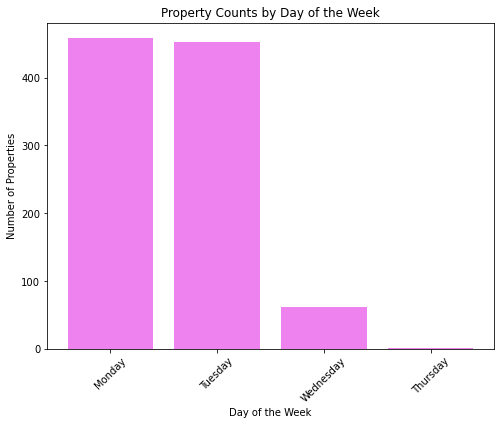

In [40]:
#Property Counts by Weekday:
plt.figure(figsize=(8,6))
weekday_counts = df['weekday'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(weekday_counts.index, weekday_counts.values, color='violet')
plt.title('Property Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

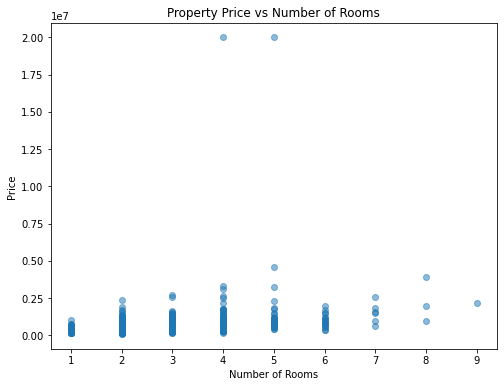

In [41]:
#Number of Rooms vs Price: 
plt.figure(figsize=(8,6))
plt.scatter(df['no_of_rooms'], df['price'], alpha=0.5)
plt.title('Property Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

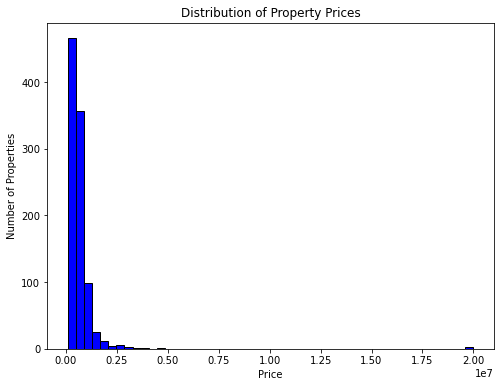

In [42]:
#Histogram : Price Distribution
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.show()

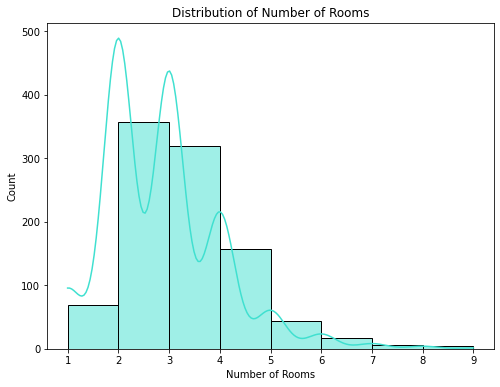

In [47]:
#Histogram showing No of Rooms
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='no_of_rooms', color='turquoise', edgecolor='black', binwidth=1, kde=True)
plt.title('Distribution of Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')
plt.show()

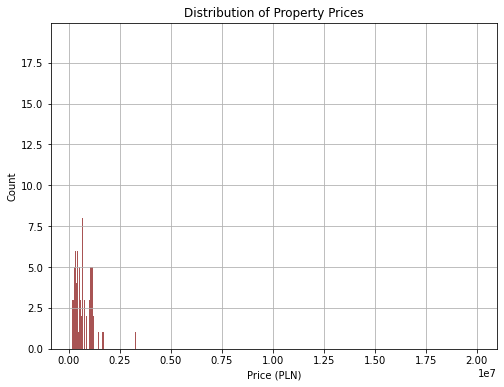

In [44]:
#For the Price Distribution Histogram:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='price', color='#8B1A1A', edgecolor='w', binwidth=5000)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (PLN)')
plt.ylabel('Count')
plt.grid(True)
plt.show()
#sns.histplot(data=df, x='price')

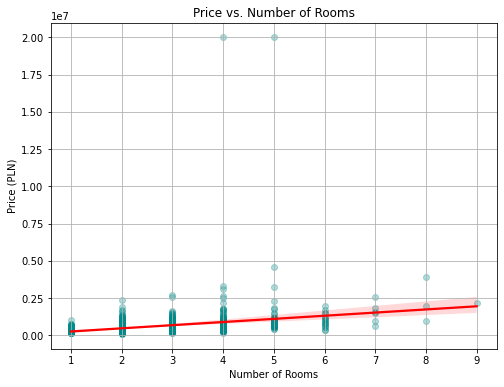

In [45]:
#Linear Regression model fit 
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='no_of_rooms', y='price', color='darkcyan', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Price vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (PLN)')
plt.grid(True)
plt.show()

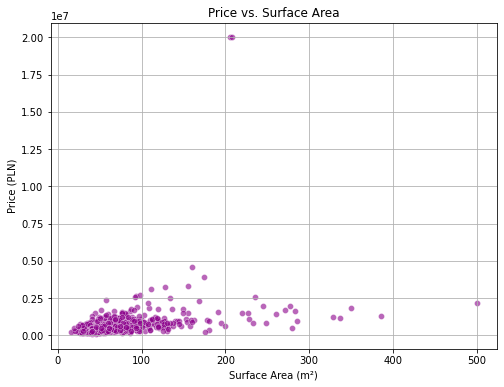

In [46]:
#Scatter Plot between surface and price
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="surface", y="price", color='#8B008B', alpha=0.6)
plt.title('Price vs. Surface Area')
plt.xlabel('Surface Area (m²)')
plt.ylabel('Price (PLN)')
plt.grid(True)
plt.show()